In [31]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix

import utils.text_processing as tp

In [15]:
# list difference example
aspect_sentiments =  [{
			'aspect': 'Laptop (general)',
			'sentiment': 'NEG'
		}, {
			'aspect': 'Price',
			'sentiment': 'POS'
		}]
aspect_sentiments2 = [{
			'aspect': 'Laptop (general)',
			'sentiment': 'POS'
		}]

def sym_compare_aspect_list(aspects, aspects2):
    diff_first_second = compare_aspect_list(aspects, aspects2)
    diff_second_first = compare_aspect_list(aspects2, aspects, only_missing=True)
  
    return diff_first_second + diff_second_first
    
    
def compare_aspect_list(aspects, aspects2, only_missing=False):
    '''
    check if aspects2 contains all elements from aspects
    compare if sentiments are identical
    returns list with differences
    '''
    diff = []
    for aspect in aspects:
        found = False
        for aspect2 in aspects2:
            if aspect['aspect'] == aspect2['aspect']:
                found = True
                if aspect['sentiment'] == aspect2['sentiment']:
                    continue # same
                else:
                    if only_missing:
                        diff.append({'first': aspect, 'second': aspect2})

        if not found:
            diff.append({'first': aspect, 'second': None})
    return diff

                
print(sym_compare_aspect_list(aspect_sentiments, aspect_sentiments2))

[{'first': {'aspect': 'Price', 'sentiment': 'POS'}, 'second': None}, {'first': {'aspect': 'Laptop (general)', 'sentiment': 'POS'}, 'second': {'aspect': 'Laptop (general)', 'sentiment': 'NEG'}}]


In [14]:
o_sent = set('This computer is Amazing'.split())
m_sent = set('computer is Amazing'.split())

word = o_sent.difference(m_sent)
word

{'This'}

In [16]:
index = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
words = ['hi', 'ich', 'bin', 'nora', 'hofer', 'hello', 'my', 'name', 'is', 'nori']

In [18]:
print(index[5])

2


In [25]:
packages = []
sent = []
check = 1
for e, word in enumerate(words):
    i = index[e]    
    if i == check:
        sent.append(word)
    else:
        packages.append(sent)
        sent = []
        sent.append(word)
    check = i
packages.append(sent)


print(packages)
    
    

[['hi', 'ich', 'bin', 'nora', 'hofer'], ['hello', 'my', 'name', 'is', 'nori']]


In [12]:
pmethod = 'typos'

In [13]:
%store -r important_words
%store -r sentence_packages
%store -r ds
%store -r advds
%store -r extended_original_predictions
%store -r extended_modified_predictions

In [42]:
sentence_packages = [{'original_sentence': 'This computer is absolutely AMAZING!!!', 'modified_sentences': [('This', 'computer is absolutely AMAZING!!!'), ('computer', 'This is absolutely AMAZING!!!'), ('is', 'This computer absolutely AMAZING!!!'), ('absolutely', 'This computer is AMAZING!!!'), ('AMAZING!!!', 'This computer is absolutely')]}, {'original_sentence': '10 plus hours of battery...', 'modified_sentences': [('10', 'plus hours of battery...'), ('plus', '10 hours of battery...'), ('hours', '10 plus of battery...'), ('of', '10 plus hours battery...'), ('battery...', '10 plus hours of')]}]

In [43]:
len(sentence_packages)

2

In [ ]:
if modified_words[index] is None:
            modified_sentences.append(sentence)
            continue  
               
        
            
        if isinstance(modified_words[index], list): 
            modified_sentences_list = []
            for word in modified_words[index]:
                modified_sentences_list.append(sentence.replace(important_words[index], word))
            modified_sentences.append(modified_sentences_list)               
            continue    
        print(important_words[index], modified_words[index])
        modified_sentences.append(sentence.replace(important_words[index], modified_words[index]))  

In [198]:
original_sentences = ['This computer is absolutely AMAZING!!!',
                         '10 plus hours of battery...',
                         'super fast processor and really nice graphics card..',
                         'super fast processor and really nice graphics card..',
                         'and plenty of storage with 250 gb(though I will upgrade this and the ram..)']
important_words_list = [[], [], ['card..'], ['card..'], ['plenty', 'storage']]
modified_words_list = [[], [], [['c4rd..', 'COOOD']], [['c4rd..']], [['p13nty'], ['5t0r4g3']]]

In [199]:
def generate_modified_sentences(original_sentences, important_words_list, modified_words_list):
    
    modified_sentences_list = []
    for sent_idx, sentence in enumerate(original_sentences):
        # print(sent_idx, sentence)
        # print(important_words_list[sent_idx])
                
        modified_sentences = []
        for iword_idx, iword in enumerate(important_words_list[sent_idx]):
            for mwords in modified_words_list[sent_idx]:
                for mword in mwords:               
                      
                    modified_sentences.append(sentence.replace(iword, mword))
        modified_sentences_list.append(modified_sentences)
        
    return modified_sentences_list

In [200]:
modified_sentences_list = generate_modified_sentences(original_sentences, important_words_list, modified_words_list)

In [201]:
modified_sentences_list

[[],
 [],
 ['super fast processor and really nice graphics c4rd..',
  'super fast processor and really nice graphics COOOD'],
 ['super fast processor and really nice graphics c4rd..'],
 ['and p13nty of storage with 250 gb(though I will upgrade this and the ram..)',
  'and 5t0r4g3 of storage with 250 gb(though I will upgrade this and the ram..)',
  'and plenty of p13nty with 250 gb(though I will upgrade this and the ram..)',
  'and plenty of 5t0r4g3 with 250 gb(though I will upgrade this and the ram..)']]

In [ ]:
[   {      "original_sentence":"got more than 10 hours of battery.",
      "modified_sentences":[
          ('than', 'got more 10 hours of battery.')
      ]
   
},
   {      "original_sentence":"a super fast processor and a really nice graphics card.",
      "modified_sentences":[
         ('than', 'got more 10 hours of battery.'),
         ('hours', 'got more 10 of battery.')
      
]}
]

In [16]:
sentence_packages = [{'original_sentence': 'got more than 10 hours of battery.', 'modified_sentences': [('than', 'got more 10 hours of battery.')]}, {'original_sentence': 'a super fast processor and a really nice graphics card.', 'modified_sentences': [('fast', 'a super processor and a really nice graphics card.'), ('processor', 'a super fast and a really nice graphics card.')]}, {'original_sentence': 'Also plenty of storage with 250 GB ram.', 'modified_sentences': [('plenty', 'Also of storage with 250 GB ram.'), ('ram.', 'Also plenty of storage with 250 GB')]}, {'original_sentence': "I'm shocked as to how easy it is to get used to.", 'modified_sentences': [('used', "I'm shocked as to how easy it is to get to."), ('to.', "I'm shocked as to how easy it is to get used")]}, {'original_sentence': 'GET THIS COMPUTER FOR PORTABILITY AND FAST PROCESSING!', 'modified_sentences': [('PORTABILITY', 'GET THIS COMPUTER FOR AND FAST PROCESSING!'), ('FAST', 'GET THIS COMPUTER FOR PORTABILITY AND PROCESSING!'), ('PROCESSING!', 'GET THIS COMPUTER FOR PORTABILITY AND FAST')]}, {'original_sentence': 'the laptop was really good and it goes really fast just the way i thought it would run.', 'modified_sentences': [('fast', 'the laptop was really good and it goes really just the way i thought it would run.')]}, {'original_sentence': 'i would really recommend it to any person out there to get this laptop because its really worth it.', 'modified_sentences': [('worth', 'i would really recommend it to any person out there to get this laptop because its really it.')]}, {'original_sentence': 'And its really cheap and you wont regret buying it.', 'modified_sentences': [('cheap', 'And its really and you wont regret buying it.'), ('wont', 'And its really cheap and you regret buying it.'), ('regret', 'And its really cheap and you wont buying it.')]}]

In [20]:
important_words_packages = []
for package in sentence_packages:
    important_words = []
    for sentence in package['modified_sentences']:
        important_words.append(sentence[0])
    print('imp_wds: ', important_words)
    important_words_packages.append(important_words)

print('imp_we3ds_pckgs: ', important_words_packages)   
    
    

imp_wds:  ['than']
imp_wds:  ['fast', 'processor']
imp_wds:  ['plenty', 'ram.']
imp_wds:  ['used', 'to.']
imp_wds:  ['PORTABILITY', 'FAST', 'PROCESSING!']
imp_wds:  ['fast']
imp_wds:  ['worth']
imp_wds:  ['cheap', 'wont', 'regret']
imp_we3ds_pckgs:  [['than'], ['fast', 'processor'], ['plenty', 'ram.'], ['used', 'to.'], ['PORTABILITY', 'FAST', 'PROCESSING!'], ['fast'], ['worth'], ['cheap', 'wont', 'regret']]


In [24]:
%store -r important_words_packages_dev
%store -r sentence_packages_dev
%store -r loo_results_dev

In [25]:
important_words_packages = important_words_packages_dev
sentence_packages = sentence_packages_dev
loo_results = loo_results_dev

In [26]:
# Original Sentences

original_sentences = []
for package in sentence_packages:
    original_sentences.append(package['original_sentence'])

In [23]:
def generate_modified_sentences(original_sentences, important_words_packages, modified_words):
    assert len(original_sentences)==len(important_words)==len(modified_words), 'List length is not equal!'
    
    modified_sentences = []
    for index, sentence in enumerate(original_sentences):
        if modified_words[index] is None:
            modified_sentences.append(sentence)
            continue  
            
        if isinstance(modified_words[index], list): 
            modified_sentences_list = []
            for word in modified_words[index]:
                modified_sentences_list.append(sentence.replace(important_words[index], word))
            modified_sentences.append(modified_sentences_list)               
            continue        
        modified_sentences.append(sentence.replace(important_words[index], modified_words[index]))   
        
    return modified_sentences

In [13]:
l = [[['1', '2'],['3','4']],['5'],[['6']]]

NameError: name 'flatlist' is not defined

# flat_list

In [14]:
flat_list2 = [item for sublist in l for item in sublist for item in sublist for item in sublist ]

In [8]:
flat_list1

['hello', 'hi', 'hoi', 'heeeo', 'o', 'i', 'hooisssl']

In [15]:
flat_list2

[['1', '2'],
 ['3', '4'],
 ['1', '2'],
 ['3', '4'],
 ['1', '2'],
 ['3', '4'],
 ['1', '2'],
 ['3', '4'],
 '5',
 ['6']]

In [16]:
lst = [['ohbyo'],[None]]

In [18]:
for item in lst:
    for word in item:
        if word[0] is not None:
            print(word)

ohbyo


In [25]:
sentence_packages= [{'original_sentence': 'This computer is absolutely AMAZING!!!', 'modified_sentences': [('This', 'computer is absolutely AMAZING!!!'), ('computer', 'This is absolutely AMAZING!!!'), ('is', 'This computer absolutely AMAZING!!!'), ('absolutely', 'This computer is AMAZING!!!'), ('AMAZING!!!', 'This computer is absolutely')]}]


In [28]:
package_indices = []
package_index = 0
for package in sentence_packages:
    package_index += 1
    for mod_sent in package['modified_sentences']:
        print(mod_sent)
        package_indices.append(package_index)
        
print(len(package_indices))
print(package_index)
print(package_indices[:10])

('This', 'computer is absolutely AMAZING!!!')
('computer', 'This is absolutely AMAZING!!!')
('is', 'This computer absolutely AMAZING!!!')
('absolutely', 'This computer is AMAZING!!!')
('AMAZING!!!', 'This computer is absolutely')
5
1
[1, 1, 1, 1, 1]


In [ ]:
absorbtion->absorption
abudance->abundance
abundacies->abundances
abundancies->abundance

Das nach dem -> ist das richtige Wort

nur nehmen wenn es ein wort ist (bzw. zwei aber durch Komma getrennt)
checken, ob das richtige Wort öfter vorkommt, sonst ist das ein Fall von Varianten ovn Typos
Wenn es durch Komma getrennt ist, wird es verdoppelt denn das sind dann richtige schreibweisen 

In [95]:
test = ['t', 'e', 's', 't']
for e, item in enumerate(test):
    if item == 'e':
        item[e] = '1'
print(test)

TypeError: 'str' object does not support item assignment

In [140]:
wordcombos = [['helloo', 'hello'],['hey','hello'],['soi', 'hello'],['soi', 'dn']]

In [143]:
#for e, combo in enumerate(wordcombos[:len(wordcombos)]):
for e, combo in enumerate(wordcombos[:len(wordcombos)-1]):
    if wordcombos[e][1] == wordcombos[e+1][1]:
        word = combo[1]
        typo = list(combo[0],)
    print(word)

hello
hello
hello


In [185]:
typods = ['Typo1->Word1\n', 'Typo2->Word2, Word_2.0\n', 'Typo3->Word3\n','Typo4->Word1\n']

In [198]:
with open(os.path.join('data','common_typos_wikipedia.txt'), 'r') as f:
    typods = f.readlines()

typodict = {}
print(typods[:3])
      
for typod in typods:  
    typo = typod.split("->")[0].strip('\n')
    word = typod.split("->")[1].strip('\n')
 
    for item in word.split(", "):
        if item in typodict:
            tmp_typo = typodict[item]
            tmp_typo.append(typo)             
            tmp_typo = list(set(tmp_typo)) #filter duplicates
            typodict[item] = tmp_typo
        else:
            typodict.update({item : [typo]})

#print(typodict)

['abandonned->abandoned\n', 'aberation->aberration\n', 'abilityes->abilities\n']


In [188]:
#with open(os.path.join('data','common_typos_wikipedia.txt'), 'r') as f:
#    typods = f.readlines()

typodict = {}
#print(typods)
      
for typod in typods:  
    typo = typod.split("->")[0].strip('\n')
    word = typod.split("->")[1].strip('\n')
 
    if len(word.split(", "))>1:
        for item in word.split(", "):
            typodict.update({item : typo}) 
    else:
        typodict.update({word:typo})
    
    if word in typodict:
        tmp_typo = typodict[word] # hier bekomme ich den Typo vom neuen Word
        list(tmp_typo).append('?') # den Typo des gleichen Words, welces schon im Typodict ist
        #print('hi', tmp_typo)
        typodict[word] = tmp_typo       
       
        typodict.update({word : typo})
#print(word)

print(typodict)

{'Word1': 'Typo4', 'Word2': 'Typo2', 'Word_2.0': 'Typo2', 'Word3': 'Typo3'}


In [172]:
print(word)

Nora


In [ ]:
for item in typodict:
    if 

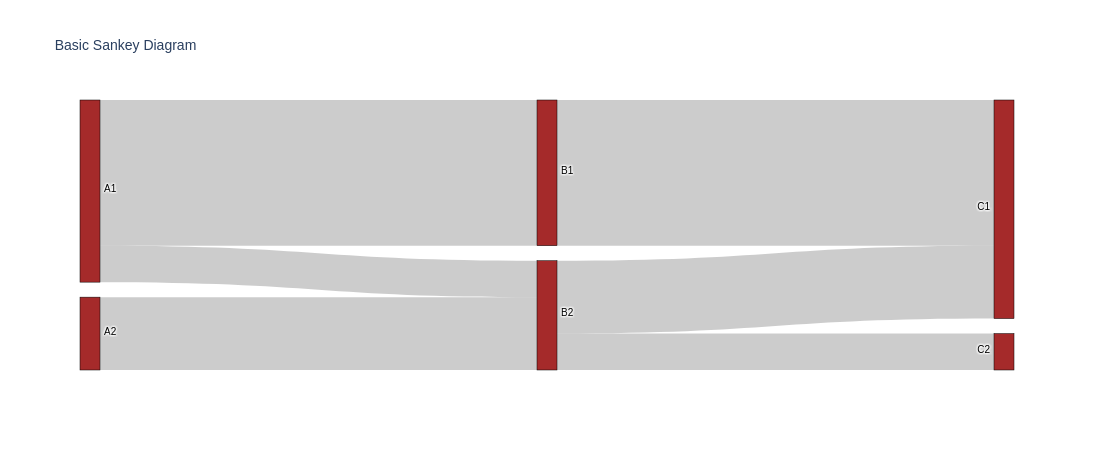